这是Andrew Ng的deeplearning.ai系列的第一部课程neuralnetwork and deeplearning的第一次编程作业。即第二周之具有神经网络思维的logistic回归的编程实现。            
大体上来说，目标是实现一个能够识别猫的简单神经网络。               
原文件提供了datasets文件夹，旗下包含了两个文件：train_catvnoncat.h5和test_catvnoncat.h5               
同时也提供了加载数据的源代码叫做lr_utils,以下是lr_utils的源代码                

```
import numpy as np
import h5py


def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels
    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels
    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))  
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes
```

通过以上源代码，可以看出：(通过下面查看程序得出)         
train_set_x_orig返回的是训练集的特征　          　
train_set_y_orig返回的是训练集的类标　　         
test_set_x_orig返回的是测试集的特征　　          
test_set_y_orig返回的是测试集的类标　            　
classes返回的是类别[b'non-cat' b'cat']        

In [2]:
import lr_utils
import matplotlib.pyplot as plt
import numpy as np

In [3]:
train_set_feature,train_set_label,test_set_feature,test_set_label,classes = lr_utils.load_dataset()

In [4]:
train_set_feature.shape

(209, 64, 64, 3)

In [5]:
train_set_label.shape

(1, 209)

In [6]:
test_set_feature.shape

(50, 64, 64, 3)

In [7]:
test_set_label.shape

(1, 50)

In [8]:
classes.shape

(2,)

In [9]:
print(classes)

[b'non-cat' b'cat']


In [10]:
print(train_set_label)

[[0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0
  0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1
  1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0
  1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1
  0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]]


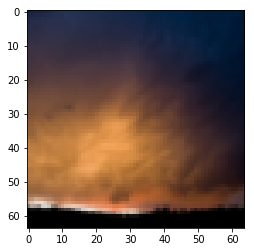

In [11]:
plt.imshow(train_set_feature[0])

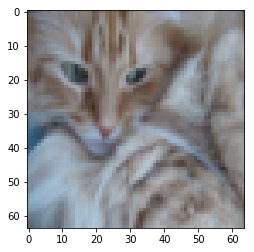

In [12]:
plt.imshow(train_set_feature[2])

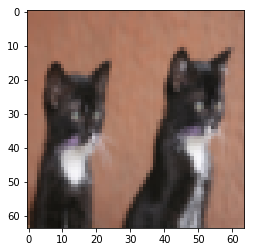

In [13]:
plt.imshow(test_set_feature[0])

In [14]:
print('训练集的照片数量 = ' + str(train_set_label.shape[1]))
print('测试集的照片数量 = ' + str(test_set_label.shape[1]))

训练集的照片数量 = 209
测试集的照片数量 = 50


In [15]:
train_set_f = train_set_feature.reshape(209,-1).T
test_set_f = test_set_feature.reshape(50,-1).T #-1 = 64 * 64 * 3自动计算 T转置
print('训练集维度：' + str(train_set_f.shape))
print('训练集标签维度：' + str(train_set_label.shape))
print('测试集维度：' + str(test_set_f.shape))
print('测试集标签维度：' + str(test_set_label.shape))

训练集维度：(12288, 209)
训练集标签维度：(1, 209)
测试集维度：(12288, 50)
测试集标签维度：(1, 50)


In [16]:
train_data = train_set_f / 255
test_data = test_set_f / 255
print('train data:\n', train_data)
print('test data:\n', test_data)

train data:
 [[0.06666667 0.76862745 0.32156863 ... 0.56078431 0.08627451 0.03137255]
 [0.12156863 0.75294118 0.27843137 ... 0.60784314 0.09411765 0.10980392]
 [0.21960784 0.74509804 0.26666667 ... 0.64705882 0.09019608 0.20784314]
 ...
 [0.         0.32156863 0.54117647 ... 0.33333333 0.01568627 0.        ]
 [0.         0.31372549 0.55294118 ... 0.41960784 0.01960784 0.        ]
 [0.         0.31764706 0.55686275 ... 0.58431373 0.         0.        ]]
test data:
 [[0.61960784 0.45098039 1.         ... 0.16078431 0.07058824 0.52156863]
 [0.40784314 0.43137255 0.99215686 ... 0.18431373 0.07058824 0.63921569]
 [0.3254902  0.43529412 0.99607843 ... 0.32941176 0.0627451  0.29411765]
 ...
 [0.67843137 0.67058824 0.52156863 ... 0.71764706 0.56470588 0.01960784]
 [0.50196078 0.69019608 0.39607843 ... 0.55294118 0.5372549  0.08627451]
 [0.43137255 0.72941176 0.4745098  ... 0.45490196 0.42352941 0.01960784]]


现在开始构建神经网络，神经网络的主要步骤如下：       
1.输入层          
2.初始化w，b           
3.循环           
　　3.1正向传播
　　3.2反向传播
　　3.3梯度下降 　　　　
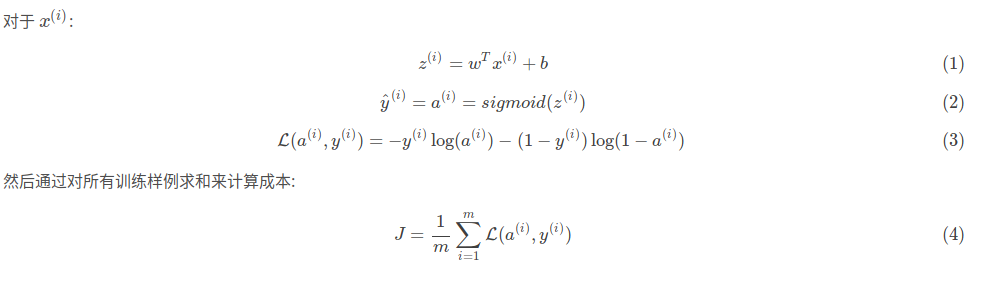

In [17]:
#sigmoid(x) = 1 / (1 + e^-x)
def sigmoid(x):
    
    result = 1 / (1 + np.exp(-x))

    return result

In [18]:
print('sigmoid(0) = ', sigmoid(0))
print('sigmoid(10) = ', sigmoid(8))
print('sigmoid(-10) = ', sigmoid(-8))


sigmoid(0) =  0.5
sigmoid(10) =  0.9996646498695336
sigmoid(-10) =  0.0003353501304664781


In [19]:
def init_w_b(dim):
    
    w = np.zeros(shape = (dim,1))
    b = 0
    
    assert w.shape == (dim,1)#assert断言来确定数组的维数正确，否则抛出断言error
    assert isinstance(b,int) or isinstance(b,float)#assert断言来确定b的类型，否则抛出断言error
    
    return (w,b)

In [20]:
def propagate(w, b, X, Y):
    '''
    w：权重矩阵 维度 = (64*64*3，1)
    b：偏移量
    X：输入 维度 = (64*64*3,样本数)
    Y：标签矢量(cat = 1， noncat = 0)，维度 = (1，样本数)
    
    cost：对logistic回归计算损失函数L后在进行累加求成本得到代价函数J 参考公式3,4
    dw：由反向传播推导可得X(A - Y)^T
    db：由反向传播推导可得A - Y
    '''
    m = X.shape[1]#样本数
    
    #正向传播
    A = sigmoid(np.dot(w.T,X) + b) # z = w^T * X + b; A = sigmoid(z)
    cost = (-1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    
    #反向传播
    dw = (1 / m) * np.dot(X, (A - Y).T)#可参考我的博客的手动推导或者吴恩达老师的视频
    db = (1 / m) * np.sum(A - Y)
    
    #断言确定维度
    assert dw.shape == w.shape
    assert db.dtype == float
    cost = np.squeeze(cost)#把维度为1的嵌套去掉
    assert cost.shape == ()
    
    #创建字典保存dw，和db
    grads = {
        "dw": dw,
        "db": db
    }
    
    return (grads, cost)

In [21]:
print("--------------------------------test propagate---------------------------------------")
w = np.random.rand(2,1)
b = 2
X = np.random.rand(2,2)
Y = np.random.randint(0,2,size = (1,2))
print(w)
print(b)
print(X)
print(Y)
grads,cost = propagate(w,b,X,Y)
print("dw: " + str(grads['dw']))
print('db: ', str(grads['db']))
print('cost: ', cost)


--------------------------------test propagate---------------------------------------
[[0.49402381]
 [0.88361582]]
2
[[0.62158373 0.55019851]
 [0.33120795 0.57291772]]
[[1 1]]
dw: [[-0.03759223]
 [-0.0282165 ]]
db:  -0.06383859248692436
cost:  0.06598350072846237


In [22]:
def optimize(w, b, X, Y, num_iterations, learning_rate):
    """
    此函数使用梯度下降法来优化w、b
    
    parameter：
    w：权重矩阵 维度 = (64*64*3，1)
    b：偏移量
    X：输入 维度 = (64*64*3,样本数)
    Y：标签矢量(cat = 1， noncat = 0)，维度 = (1，样本数)
    num_iterations：迭代的次数
    learning_rate：学习率α
    
    return：
    params：w和b的字典
    grads：dw和db的字典
    cost:用于绘制曲线
    
    process：
    1.使用propagate函数计算当前参数w和b的成本和梯度，forward propagate计算成本，back propagate计算梯度dw和db
    2.使用梯度下降法来更新参数
    """
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        #记录成本
        if i % 100 == 0:
            costs.append(cost)
            print('迭代次数：%i, 误差值: %f' % (i, cost))
            
    params = {
        "w" : w,
        "b" : b
    }
    grads  = {
        "dw" : dw,
        "db" : db
    }
    
    return (params, grads, costs)


In [23]:
print("---------------------------------test optimize------------------------------------------------------")
w = np.random.rand(2,1)
b = 2
X = np.random.rand(2,2)
Y = np.random.randint(0,2,size = (1,2))
params, grads, costs = optimize(w, b, X, Y, 500, learning_rate = 0.009)
print('w = ' + str(params['w']))
print('b = ' + str(params['b']))
print('dw = ' + str(grads['dw']))
print('db = ' + str(grads['db']))
print('costs = ', costs)

---------------------------------test optimize------------------------------------------------------
迭代次数：0, 误差值: 0.100147
迭代次数：100, 误差值: 0.091457
迭代次数：200, 误差值: 0.084115
迭代次数：300, 误差值: 0.077834
迭代次数：400, 误差值: 0.072405
w = [[0.53930609]
 [0.54083633]]
b = 2.353349708613905
dw = [[-0.01386187]
 [-0.02146682]]
db = -0.06541172029525827
costs =  [0.10014720090357594, 0.09145733240132031, 0.08411471324008675, 0.07783443439284668, 0.07240549271229493]


In [24]:
def predict(w, b, X):
    """
    使用已经优化好的参数w和b来预测输入值X的标签是0还是1
    
    parameter：
    w：权重矩阵 维度 = (64*64*3，1)
    b：偏移量
    X：输入 维度 = (64*64*3,样本数)
    
    return:
    predict_label:返回预测的类别是0/1
    """
    m = X.shape[1]#样本数
    predict_label = np.zeros(shape = (1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X) + b)
    for i in range(m):
        predict_label[0, i] = 1 if A[0, i] > 0.5 else 0
        
    assert predict_label.shape == (1, m)
    
    return predict_label

In [25]:
print('--------------------------------test predict----------------------------------------------------------')
w = np.random.rand(2,1)
b = 2
X = np.random.rand(2,2)
predict_label = predict(w, b, X)
print(predict_label)

--------------------------------test predict----------------------------------------------------------
[[1. 1.]]


In [26]:
def model(trainData,trainLabel,testData,testLabel,num_iterations = 2000, learning_rate = 0.05):
    """
    parameters:
    trainData:训练集数据，维度=(64*64*3, m = 209)
    trainLabel:训练集标签，维度=(1, m)
    testData:测试集数据，维度=(64*64*3, n = 50)
    testLabel:测试集标签，维度=(1, n)
    num_iterations:迭代次数
    learning_rate:学习率
    
    return：
    dic：返回有关模型信息的字典
    """
    w, b = init_w_b(trainData.shape[0])
    
    params, grads, costs = optimize(w, b, trainData, trainLabel, num_iterations, learning_rate)
    
    w, b = params['w'], params['b']
    
    predict_train = predict(w, b, trainData)
    predict_test  = predict(w, b, testData)
    
    print('训练集accuracy：', format(100 - np.mean(np.abs(predict_train - trainLabel)) * 100), '%')
    print('测试集accuracy：', format(100 - np.mean(np.abs(predict_test  - testLabel )) * 100), '%')
    
    dic = {
        'costs' : costs,
        'predict_train' : predict_train,
        'predict_test'  : predict_test,
        'w' : w,
        'b' : b,
        'iterations' : num_iterations,
        'learning_rate' : learning_rate
    } 
    
    return dic

In [27]:
print('-------------------------------------test model------------------------------------------------')
realtest = model(train_data, train_set_label, test_data, test_set_label, num_iterations = 3000, learning_rate = 0.005)

-------------------------------------test model------------------------------------------------
迭代次数：0, 误差值: 0.693147
迭代次数：100, 误差值: 0.584508
迭代次数：200, 误差值: 0.466949
迭代次数：300, 误差值: 0.376007
迭代次数：400, 误差值: 0.331463
迭代次数：500, 误差值: 0.303273
迭代次数：600, 误差值: 0.279880
迭代次数：700, 误差值: 0.260042
迭代次数：800, 误差值: 0.242941
迭代次数：900, 误差值: 0.228004
迭代次数：1000, 误差值: 0.214820
迭代次数：1100, 误差值: 0.203078
迭代次数：1200, 误差值: 0.192544
迭代次数：1300, 误差值: 0.183033
迭代次数：1400, 误差值: 0.174399
迭代次数：1500, 误差值: 0.166521
迭代次数：1600, 误差值: 0.159305
迭代次数：1700, 误差值: 0.152667
迭代次数：1800, 误差值: 0.146542
迭代次数：1900, 误差值: 0.140872
迭代次数：2000, 误差值: 0.135608
迭代次数：2100, 误差值: 0.130708
迭代次数：2200, 误差值: 0.126137
迭代次数：2300, 误差值: 0.121861
迭代次数：2400, 误差值: 0.117855
迭代次数：2500, 误差值: 0.114093
迭代次数：2600, 误差值: 0.110554
迭代次数：2700, 误差值: 0.107219
迭代次数：2800, 误差值: 0.104072
迭代次数：2900, 误差值: 0.101097
训练集accuracy： 99.52153110047847 %
测试集accuracy： 68.0 %


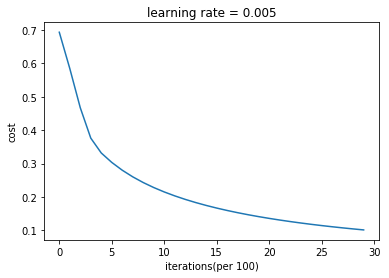

In [28]:
costs = np.squeeze(realtest['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations(per 100)')
plt.title('learning rate = ' + str(realtest['learning_rate']))
plt.show()

learning rate: 0.01
迭代次数：0, 误差值: 0.693147
迭代次数：100, 误差值: 0.823921
迭代次数：200, 误差值: 0.418944
迭代次数：300, 误差值: 0.617350
迭代次数：400, 误差值: 0.522116
迭代次数：500, 误差值: 0.387709
迭代次数：600, 误差值: 0.236254
迭代次数：700, 误差值: 0.154222
迭代次数：800, 误差值: 0.135328
迭代次数：900, 误差值: 0.124971
迭代次数：1000, 误差值: 0.116478
迭代次数：1100, 误差值: 0.109193
迭代次数：1200, 误差值: 0.102804
迭代次数：1300, 误差值: 0.097130
迭代次数：1400, 误差值: 0.092043
训练集accuracy： 99.52153110047847 %
测试集accuracy： 68.0 %

-------------------------------------------------------------------------------------------------

learning rate: 0.001
迭代次数：0, 误差值: 0.693147
迭代次数：100, 误差值: 0.591289
迭代次数：200, 误差值: 0.555796
迭代次数：300, 误差值: 0.528977
迭代次数：400, 误差值: 0.506881
迭代次数：500, 误差值: 0.487880
迭代次数：600, 误差值: 0.471108
迭代次数：700, 误差值: 0.456046
迭代次数：800, 误差值: 0.442350
迭代次数：900, 误差值: 0.429782
迭代次数：1000, 误差值: 0.418164
迭代次数：1100, 误差值: 0.407362
迭代次数：1200, 误差值: 0.397269
迭代次数：1300, 误差值: 0.387802
迭代次数：1400, 误差值: 0.378888
训练集accuracy： 88.99521531100478 %
测试集accuracy： 64.0 %

--------------------------

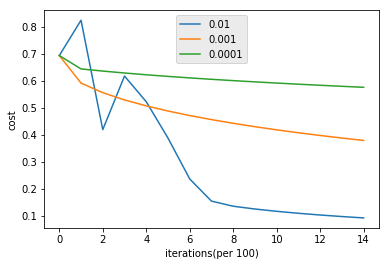

In [29]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}

for i in learning_rates:
    print('learning rate: ' + str(i))
    models[str(i)] = model(train_data, train_set_label, test_data, test_set_label, num_iterations = 1500, learning_rate = i)
    print('\n' + '-------------------------------------------------------------------------------------------------' + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]['costs']), label = str(models[str(i)]['learning_rate']))

plt.ylabel('cost')
plt.xlabel('iterations(per 100)')

legend = plt.legend(loc = 'upper center')
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()